# Lipkin Model

Consider a two level system with the lower energy state ($\sigma = -1$) having an energy of $-\epsilon/2$ and the upper energy state ($\sigma=1$) having an energy of $\epsilon/2$.
Now, consider a another system with $\Omega \in \mathbb{Z}^+$ copies of this two level system.

This gives a system with two quantum numbers, $\sigma \in \{-1,1\}$, and $m \in \{1,2,\dots,\Omega\}$.
In Fock space, the Hamiltonian for this system is
$$\begin{align}
	\hat{H} &= \frac{1}{2} \epsilon \sum_{m\sigma}\sigma a_{m\sigma}^\dagger a_{m\sigma}- \frac{1}{2}V\sum_{mm'\sigma}a_{m\sigma}^\dagger a_{m'\sigma}^\dagger a_{m'-\sigma}a_{m-\sigma}.
\end{align}$$
The $V$ term here is the two particle interaction term between adjacent particles.

## Quasi-spin Operators

One can consider the operators
$$\begin{align}
	\hat{K}_3 &= \frac{1}{2} \sum_{m=1}^\Omega (a_{m+}^\dagger a_{m+}-a_{m-}^\dagger a_{m-}),\\
	\hat{K}_+ &= \sum_{m=1}^\Omega a_{m+}^\dagger a_{m-},\\
	\hat{K}_- &= (\hat{K}_+)^\dagger,\\
		&= \sum_{m=1}^\Omega a_{m-}^\dagger a_{m+}.
\end{align}$$


### Commutation Relations

$$\begin{align}
	[\hat{K}_+,\hat{K}_-] &= \sum_{m=1}^\Omega\sum_{n=1}^\Omega a_{m+}^\dagger a_{m-} a_{n-}^\dagger a_{n+} - a_{n-}^\dagger a_{n+} a_{m+}^\dagger a_{m-},\\
	&= \sum_{m=1}^\Omega\sum_{n=1}^\Omega a_{m+}^\dagger  (\delta_{m-n-} - a_{n-}^\dagger a_{m-}) a_{n+} - a_{n-}^\dagger (\delta_{m+n+} - a_{m+}^\dagger a_{n+}) a_{m-},\\
	&= \sum_{m=1}^\Omega a_{m+}^\dagger a_{m+} - a_{m-}^\dagger a_{m-} + \sum_{m=1}^\Omega\sum_{n=1}^\Omega a_{n-}^\dagger a_{m+}^\dagger a_{n+} a_{m-} - a_{m+}^\dagger a_{n-}^\dagger a_{m-} a_{n+},\\
	&= 2\hat{K}_3 + 0,\\
	&= 2\hat{K}_3.
\end{align}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from math import e,pi,comb

In [3]:
Ω = 12
N = 12
ε = 1

dv = 0.001
V = np.arange(0,2+dv,dv)*(ε/(Ω-1))


In [4]:
def K(K):
	k = np.arange(-K,K+1,1)

	K_3 = sps.diags(k,0)
	K_p = sps.diags([1],offsets=1,shape=K_3.shape)
	K_m = sps.diags([1],offsets=-1,shape=K_3.shape)

	K_p = np.sqrt(K*(K+1)*sps.eye(K_3.shape[0]) - K_3@(K_3+sps.eye(K_3.shape[0])))@K_p
	K_m = np.sqrt(K*(K+1)*sps.eye(K_3.shape[0]) - K_3@(K_3-sps.eye(K_3.shape[0])))@K_m

	return K_3,K_p,K_m


In [5]:
eigs = []
eigv = []
H = []
for k in range(int(N/2)+1):
	K_3,K_p,K_m = K(k)
	es = []
	ev = []
	Hs = []
	for v in V:
		h = ε * K_3 - 0.5*v*(K_p@K_p+K_m@K_m)
		Hs.append(h)
		λ,ω = np.linalg.eig(h.toarray())
		λ = λ.real
		inds = np.argsort(λ)
		es.append(λ[inds])
		ev.append(ω[:,inds])
	es = np.array(es)
	ev = np.array(ev)
	Hs = np.array(Hs)
	eigs.append(es)
	eigv.append(ev)
	H.append(Hs)

In [6]:
r = []
for n in range(K_3.shape[0]):
	if K_3.toarray()[n,n] % 1 == 0:
		if K_3.toarray()[n,n] % 2 == 0:
			r.append(1)
		else:
			r.append(-1)
	else:
		if (K_3.toarray()[n,n]+0.5) % 2 == 1:
			r.append(1j)
		else:
			r.append(-1j)

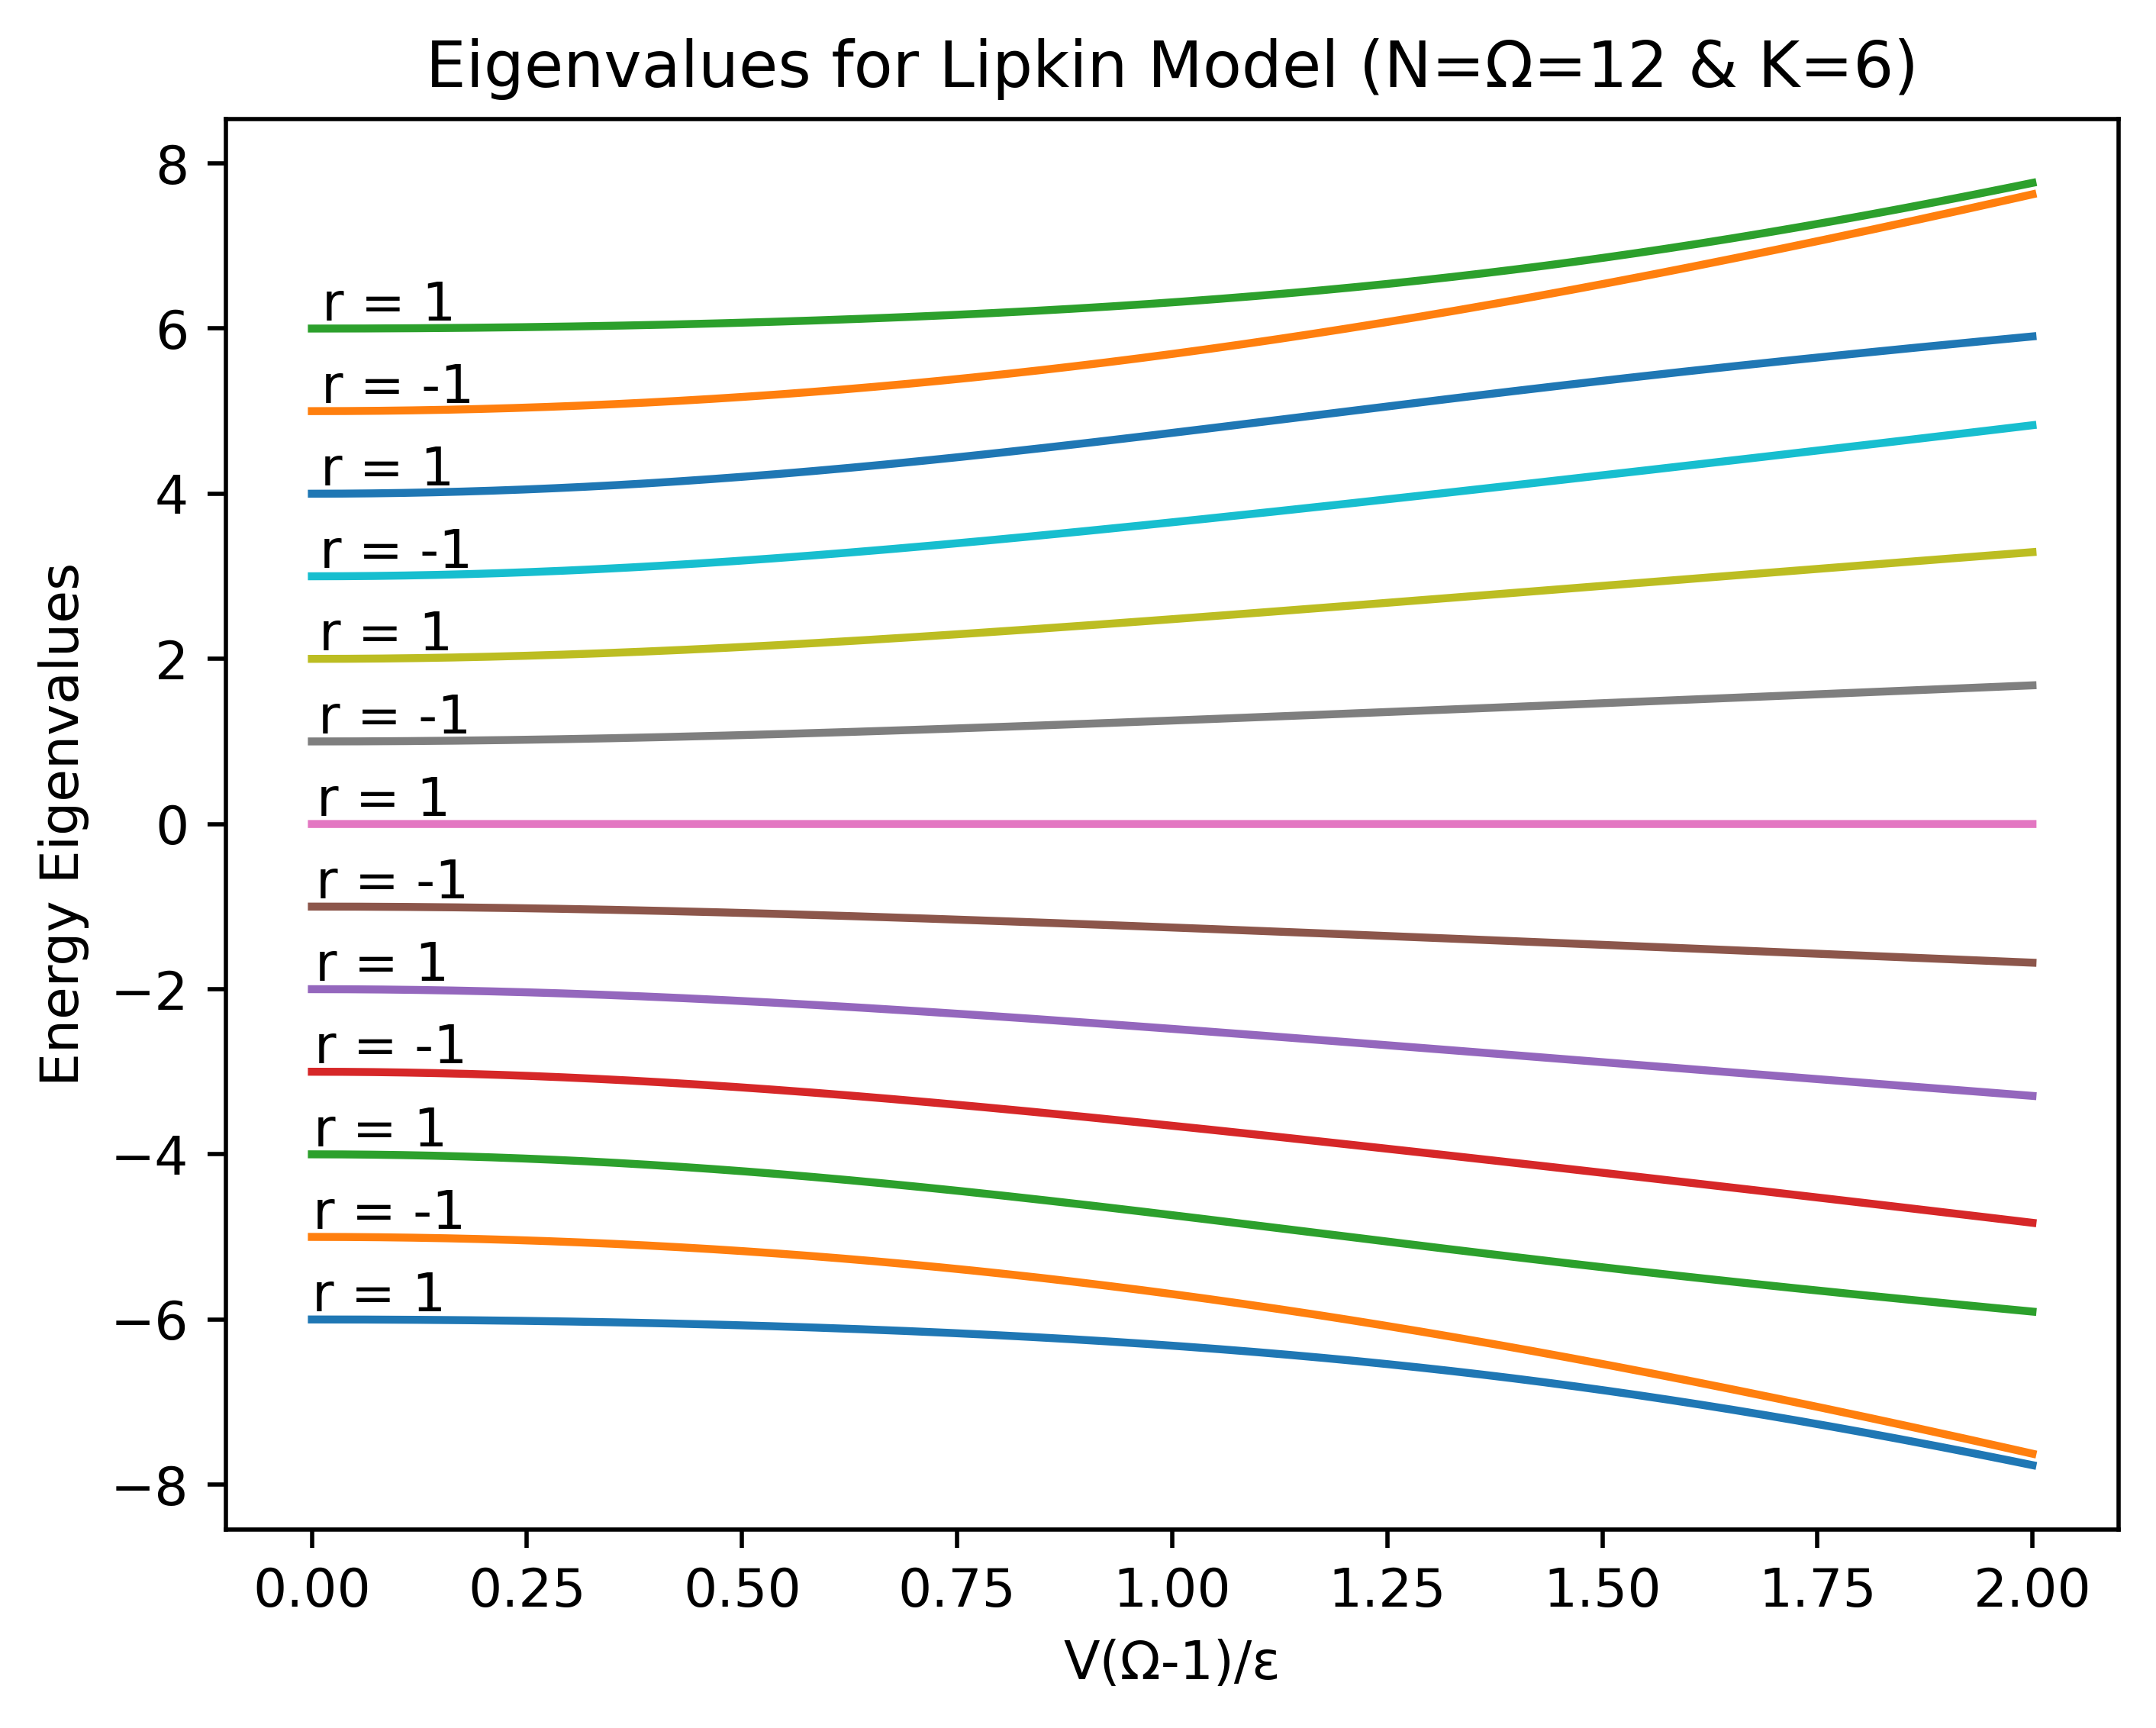

In [7]:
fig = plt.figure(dpi=500)
plt.plot(V*(Ω-1)/ε,eigs[-1])
plt.title(r"Eigenvalues for Lipkin Model (N=Ω=12 & K=6)")
plt.ylabel(r"Energy Eigenvalues")
plt.xlabel(r"V(Ω-1)/ε")

for n in range(len(r)):
	plt.annotate(
		f"r = {r[n]}",
		((V*(Ω-1)/ε)[n],eigs[-1][0,n]+0.1),
	)

plt.show()

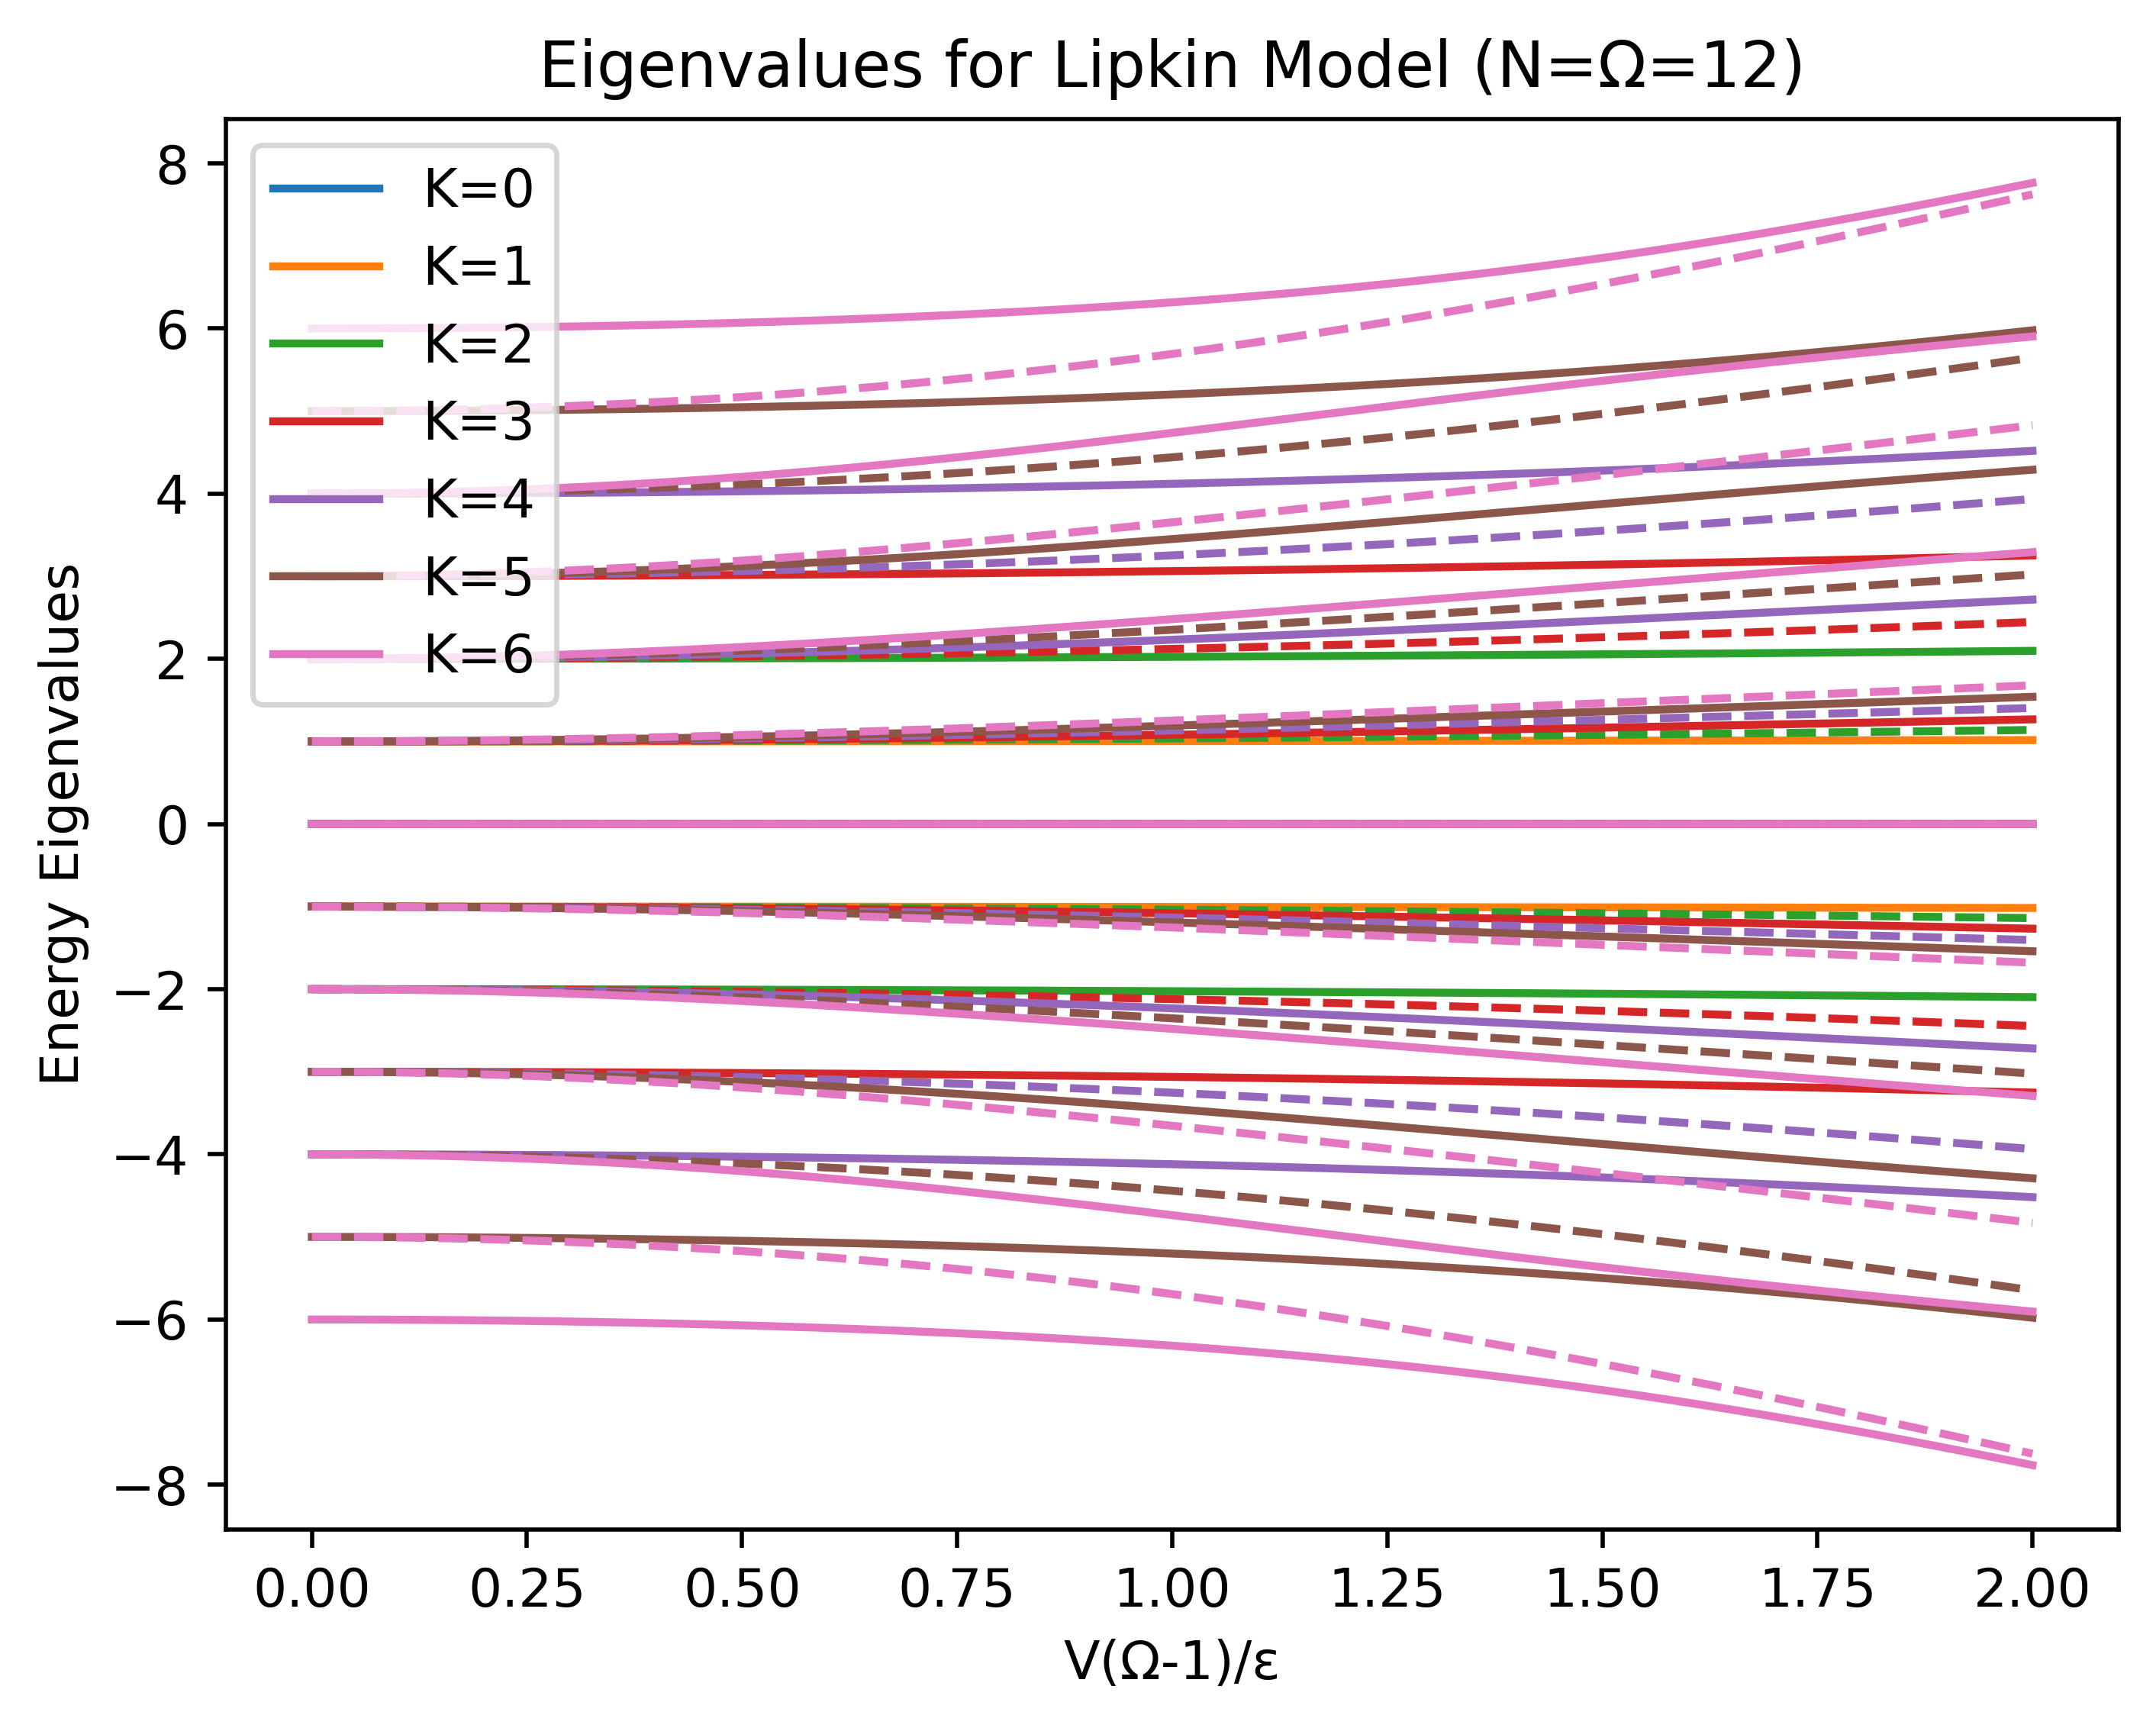

In [8]:
fig = plt.figure(dpi=500)
for m in range(len(eigs)):
	for n in range(eigs[m].shape[1]):
		if n % 2 == 0:
			lsty = "-"
		else:
			lsty = "--"
		if n == 0:
			plt.plot(V*(Ω-1)/ε,eigs[m][:,n],f"C{m}"+lsty,label=f"K={m}")
		else:
			plt.plot(V*(Ω-1)/ε,eigs[m][:,n],f"C{m}"+lsty)
plt.legend()
plt.title(r"Eigenvalues for Lipkin Model (N=Ω=12)")
plt.ylabel(r"Energy Eigenvalues")
plt.xlabel(r"V(Ω-1)/ε")
plt.show()

[[-6.     0.    -1.477  0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.   ]
 [ 0.    -5.     0.    -2.335  0.     0.     0.     0.     0.     0.
   0.     0.     0.   ]
 [-1.477  0.    -4.     0.    -2.988  0.     0.     0.     0.     0.
   0.     0.     0.   ]
 [ 0.    -2.335  0.    -3.     0.    -3.45   0.     0.     0.     0.
   0.     0.     0.   ]
 [ 0.     0.    -2.988  0.    -2.     0.    -3.726  0.     0.     0.
   0.     0.     0.   ]
 [ 0.     0.     0.    -3.45   0.    -1.     0.    -3.818  0.     0.
   0.     0.     0.   ]
 [ 0.     0.     0.     0.    -3.726  0.     0.     0.    -3.726  0.
   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -3.818  0.     1.     0.    -3.45
   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -3.726  0.     2.     0.
  -2.988  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -3.45   0.     3.
   0.    -2.335  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -2.988  0.

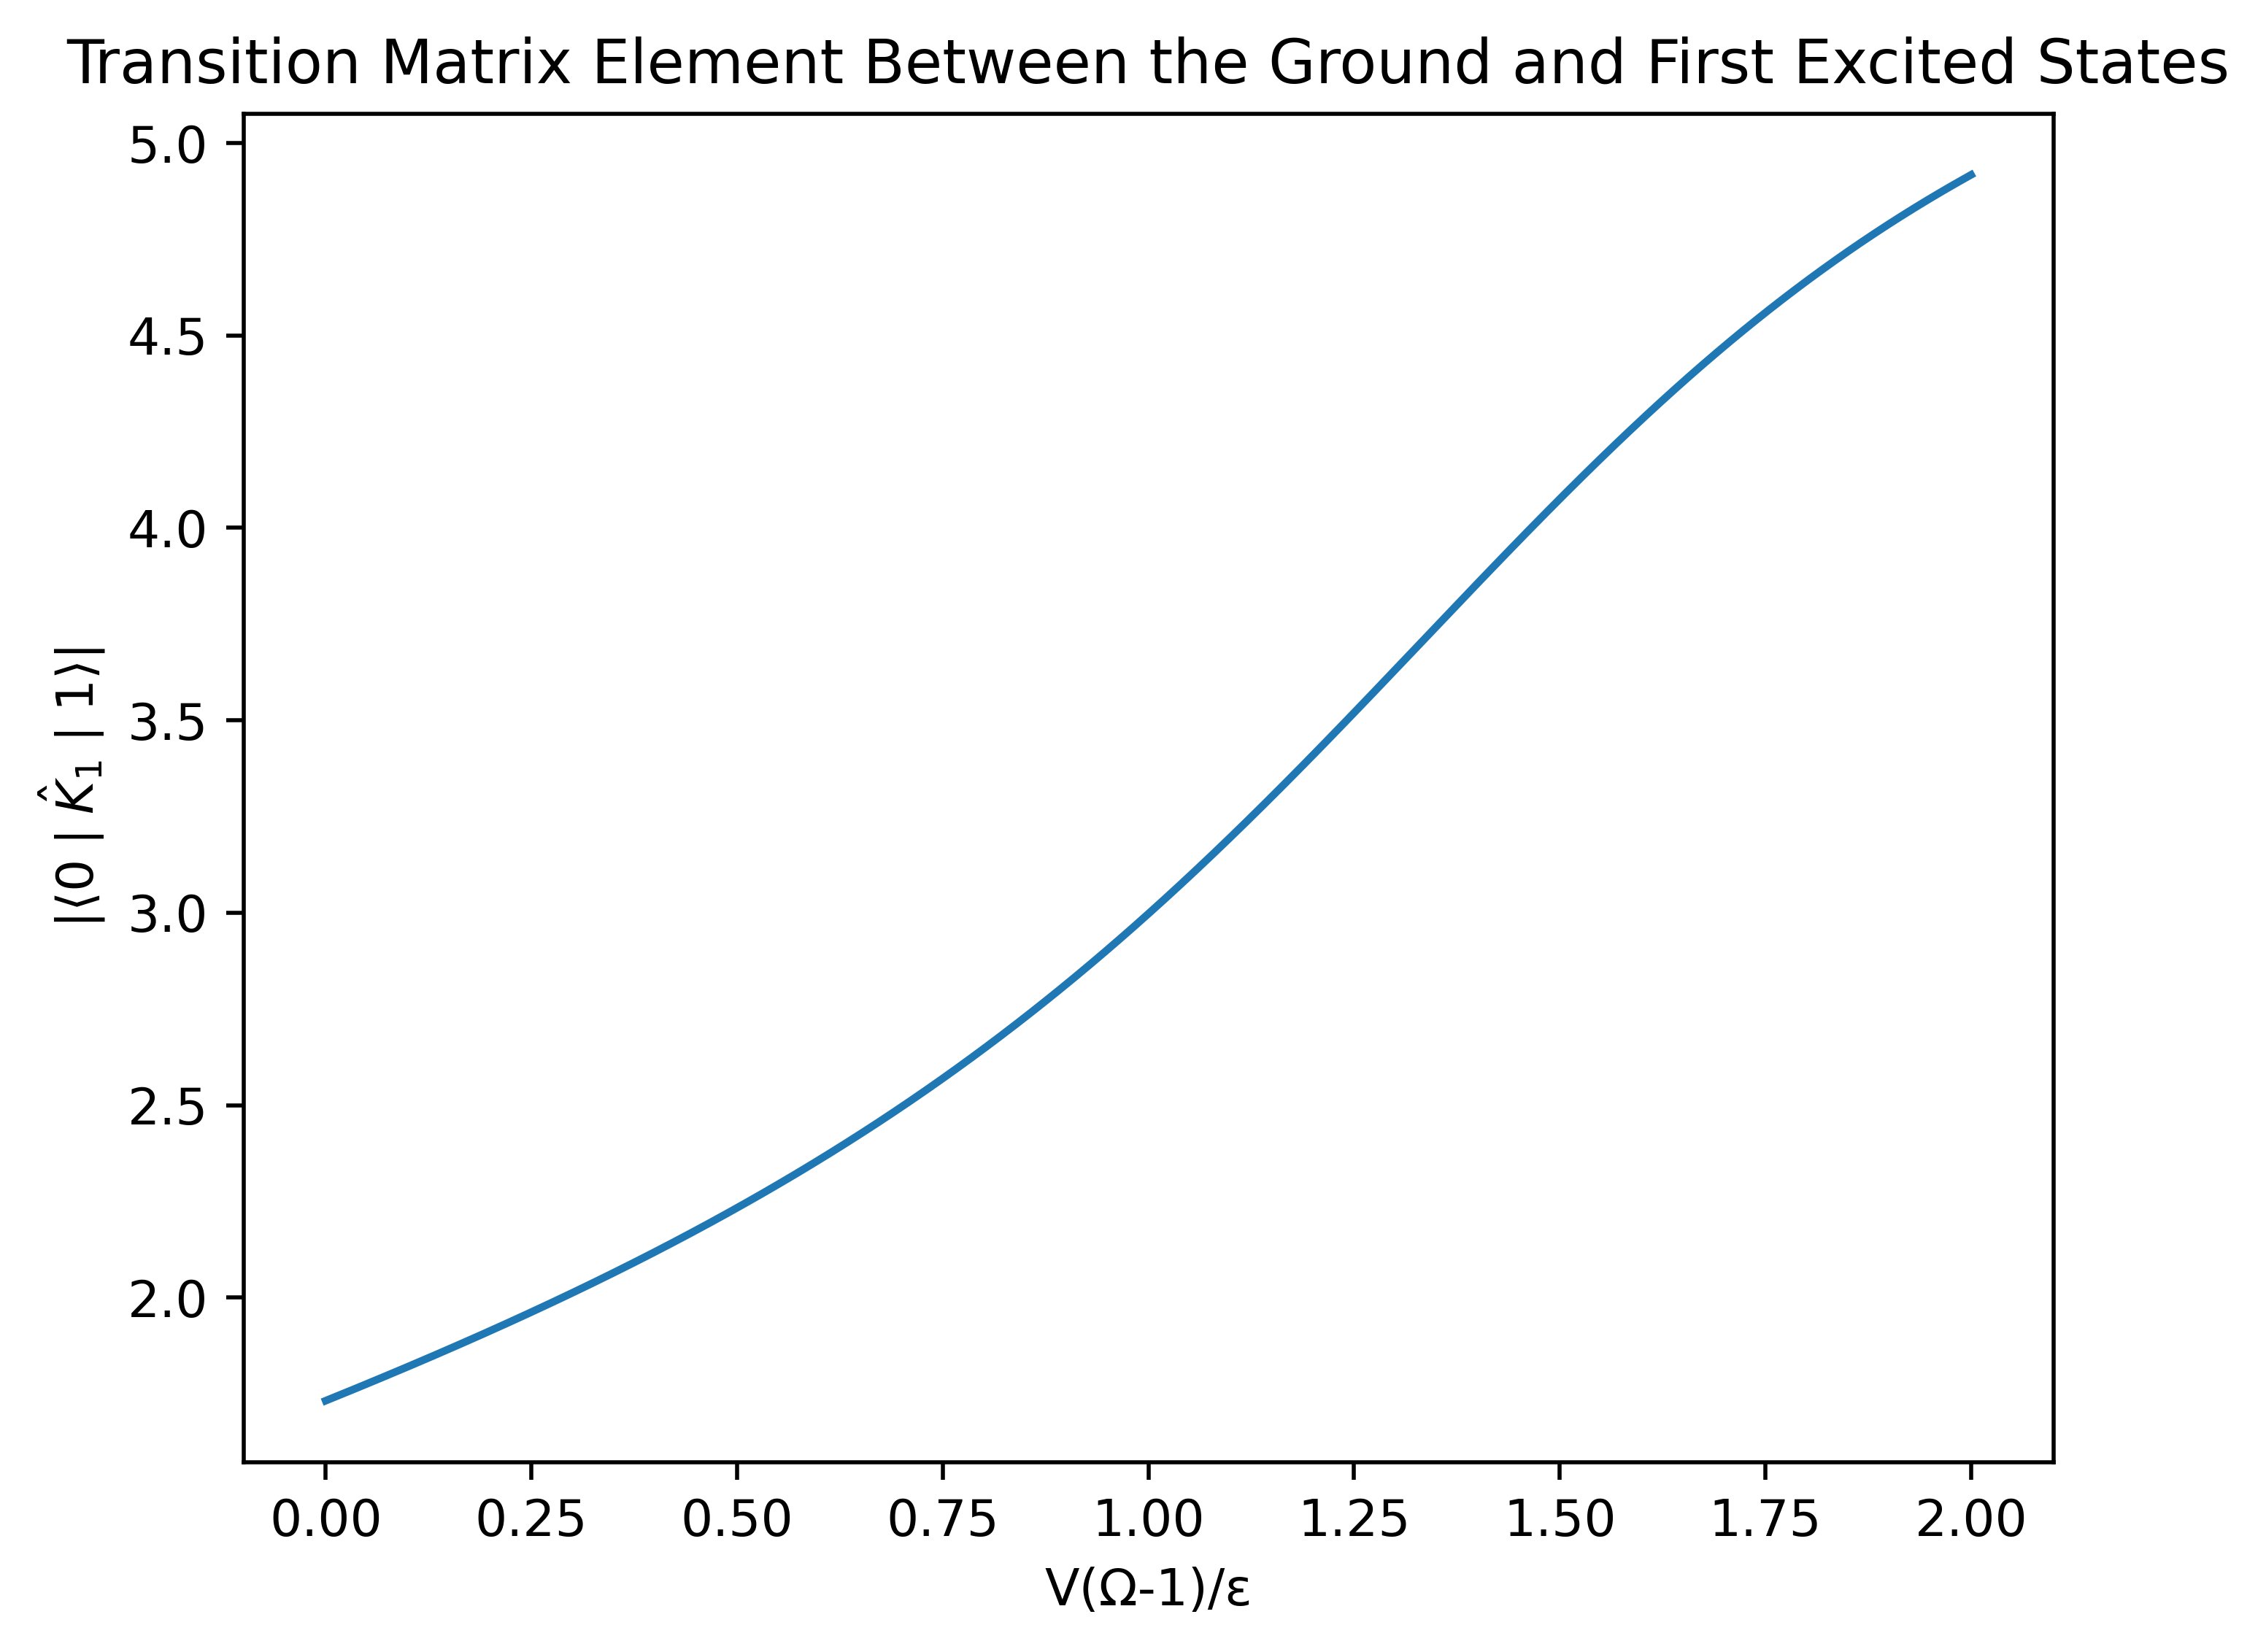

In [9]:
K_3,K_p,K_m = K(6)
K_1 = 0.5*(K_p+K_m)

ev = [eigv[-1][0,:,0]@K_1@eigv[-1][0,:,1]]
for n in range(1,len(V)):
	ev.append(eigv[-1][n,:,0]@K_1@eigv[-1][n,:,1])

n = 0
v = 0
# print((eigv[-1][v,:,n]@K_1@eigv[-1][v,:,n+1]).round(5))
print(H[-1][-1].toarray().round(3))
fig = plt.figure(dpi=500)
plt.plot(V*(Ω-1)/ε,np.abs(ev))
plt.title(r"Transition Matrix Element Between the Ground and First Excited States")
plt.ylabel(r"$|\langle 0\mid\hat{K}_1\mid 1\rangle|$")
plt.xlabel(r"V(Ω-1)/ε")
plt.show()

Allowed states:
$$\begin{align*}
	| 1010 \rangle \\
	| 1001 \rangle \\
	| 0110 \rangle \\
	| 0101 \rangle \\
	| 1100 \rangle \\
	| 0011 \rangle 
\end{align*}$$

As a reminder:
$$\begin{align}
	\hat{K}_3 &= \frac{1}{2} \sum_{m=1}^\Omega (a_{m+}^\dagger a_{m+}-a_{m-}^\dagger a_{m-}),\\
	\hat{K}_+ &= \sum_{m=1}^\Omega a_{m+}^\dagger a_{m-},\\
	\hat{K}_- &= (\hat{K}_+)^\dagger,\\
		&= \sum_{m=1}^\Omega a_{m-}^\dagger a_{m+}.
\end{align}$$

Under the $\hat{K}_3$ operation
$$\begin{align*}
	\hat{K}_3:\qquad&&\hat{K}_+:\qquad&&\hat{K}_-:\qquad&\\
	| 1010 \rangle &\rightarrow -| 1010 \rangle & | 1010 \rangle &\rightarrow | 0110 \rangle+| 1001 \rangle & | 1010 \rangle &\rightarrow 0\\
	| 0110 \rangle &\rightarrow 0 & | 0110 \rangle &\rightarrow | 0101 \rangle & | 0110 \rangle &\rightarrow | 1010 \rangle \\
	| 1001 \rangle &\rightarrow 0 & | 1001 \rangle &\rightarrow | 0101 \rangle & | 1001 \rangle &\rightarrow | 1010 \rangle\\
	| 0101 \rangle &\rightarrow  | 0101 \rangle & | 0101 \rangle &\rightarrow  0 & | 0101 \rangle &\rightarrow  | 1001 \rangle + | 0110 \rangle\\
	| 1100 \rangle &\rightarrow 0 & | 1100 \rangle &\rightarrow 0 & | 1100 \rangle &\rightarrow 0\\
	| 0011 \rangle &\rightarrow 0 & | 0011 \rangle &\rightarrow 0 & | 0011 \rangle &\rightarrow 0
\end{align*}$$

$$\begin{align*}
\hat{K}_3 &= 
\begin{pmatrix}
	-1 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 1 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix} &
\hat{K}_+ &= 
\begin{pmatrix}
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 1 & 0 & 0 & 0 & 0 & 0 \\
	 1 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 1 & 1 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix} &
\hat{K}_- &= 
\begin{pmatrix}
	 0 & 1 & 1 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 1 & 0 & 0 \\
	 0 & 0 & 0 & 1 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
	 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix} 
\end{align*}$$

In [10]:
Ω = 2
N = 2
ε = 1
V = 0.1

K_3,K_p,K_m = sps.lil_matrix((6,6)),sps.lil_matrix((6,6)),sps.lil_matrix((6,6))

K_3[0,0] = -1; K_3[3,3] = 1
K_p[1,0] = 1; K_p[2,0] = 1; K_p[3,1] = 1; K_p[3,2] = 1
K_m[0,1] = 1; K_m[0,2] = 1; K_m[1,3] = 1; K_m[2,3] = 1

H = ε * K_3 - 0.5*V*(K_p**2+K_m**2)
λ,ω = np.linalg.eig(H.toarray())
λ = λ.real
inds = np.argsort(λ)
λ,ω = λ[inds],ω[:,inds]

print(λ)
print(ω)

[-1.00498756  0.          0.          0.          0.          1.00498756]
[[-0.99875853  0.          0.          0.          0.          0.0498137 ]
 [ 0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]
 [-0.0498137   0.          0.          0.          0.         -0.99875853]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]]


In [11]:
Ω = 2
ε = 1
V = 0.1


N = 2
K_3,K_p,K_m = K(N/2)
H = ε*K_3-0.5*V*(K_p**2+K_m**2)
H = ε * K_3 - 0.5*V*(K_p**2+K_m**2)
λ,ω = np.linalg.eig(H.toarray())
λ = λ.real
inds = np.argsort(λ)
λ,ω = λ[inds],ω[:,inds]

print(λ)
print(ω)

[-1.00498756  0.          1.00498756]
[[-0.99875853  0.          0.0498137 ]
 [ 0.          1.          0.        ]
 [-0.0498137   0.         -0.99875853]]
